In [1]:
import numpy as np
import pandas as pd
# import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import pickle
from os import path
print('done')

done


In [2]:
train_df = pd.read_csv("Train_data.csv")
test_df = pd.read_csv("Test_data.csv")

In [3]:
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
test_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

In [8]:
test_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [9]:
cat_features = train_df.select_dtypes(include = 'object')

In [10]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

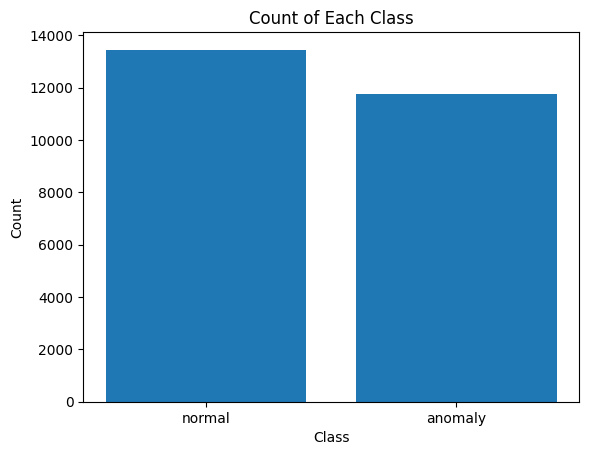

In [11]:
class_counts = train_df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Count of Each Class')

plt.show()

In [12]:
train_df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [13]:
labels ={'normal':0,'anomaly':1}
train_df['labels'] = train_df['class'].map(labels)

In [14]:
train_df[['class','labels']].head()

,class,labels
0,normal,0
1,normal,0
2,anomaly,1
3,normal,0
4,normal,0


In [15]:
num_features = train_df.select_dtypes(include = ['int64','float64'])

In [16]:
num_features.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_root', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

In [17]:
num_features.corr()['labels'].sort_values()

same_srv_rate                 -0.749237
dst_host_srv_count            -0.719292
dst_host_same_srv_rate        -0.692212
logged_in                     -0.688084
srv_diff_host_rate            -0.120649
is_guest_login                -0.038662
num_access_files              -0.036999
su_attempted                  -0.025851
num_root                      -0.019753
num_compromised               -0.018620
root_shell                    -0.018579
num_file_creations            -0.018322
num_shells                    -0.013454
hot                           -0.012839
dst_bytes                     -0.010949
num_failed_logins              0.000028
land                           0.000605
srv_count                      0.002370
src_bytes                      0.005743
urgent                         0.006743
duration                       0.050901
dst_host_srv_diff_host_rate    0.062928
dst_host_same_src_port_rate    0.092974
wrong_fragment                 0.097625
diff_srv_rate                  0.193528


In [18]:
num_features.corr()['labels'].drop('labels').sort_values()

same_srv_rate                 -0.749237
dst_host_srv_count            -0.719292
dst_host_same_srv_rate        -0.692212
logged_in                     -0.688084
srv_diff_host_rate            -0.120649
is_guest_login                -0.038662
num_access_files              -0.036999
su_attempted                  -0.025851
num_root                      -0.019753
num_compromised               -0.018620
root_shell                    -0.018579
num_file_creations            -0.018322
num_shells                    -0.013454
hot                           -0.012839
dst_bytes                     -0.010949
num_failed_logins              0.000028
land                           0.000605
srv_count                      0.002370
src_bytes                      0.005743
urgent                         0.006743
duration                       0.050901
dst_host_srv_diff_host_rate    0.062928
dst_host_same_src_port_rate    0.092974
wrong_fragment                 0.097625
diff_srv_rate                  0.193528


In [19]:
correlation_matrix = num_features.corr()

threshold = 0.90

strong_correlations = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            strong_correlations.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

strong_correlations_df = pd.DataFrame(strong_correlations, columns=['Feature 1', 'Feature 2', 'Correlation Coefficient'])

strong_correlations_df

,Feature 1,Feature 2,Correlation Coefficient
0,num_root,num_compromised,0.998956
1,srv_serror_rate,serror_rate,0.993290
2,srv_rerror_rate,rerror_rate,0.989134
3,dst_host_serror_rate,serror_rate,0.978022
4,dst_host_serror_rate,srv_serror_rate,0.976363
5,dst_host_srv_serror_rate,serror_rate,0.979602
6,dst_host_srv_serror_rate,srv_serror_rate,0.984621
7,dst_host_srv_serror_rate,dst_host_serror_rate,0.984706
8,dst_host_rerror_rate,rerror_rate,0.928992
9,dst_host_rerror_rate,srv_rerror_rate,0.919537


In [20]:
strong_correlations_list = list(strong_correlations_df['Feature 1'])

In [21]:
strong_correlations_list

['num_root',
 'srv_serror_rate',
 'srv_rerror_rate',
 'dst_host_serror_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate',
 'dst_host_srv_rerror_rate']

In [22]:
train_df.shape

(25192, 43)

In [23]:
train_df = train_df.drop(strong_correlations_list, axis = 1)

In [24]:
train_df['service'].nunique()

66

In [25]:
train_df = train_df.drop('service', axis = 1)

In [26]:
train_df.shape

(25192, 35)

In [27]:
test_df.shape

(22544, 41)

In [28]:
test_df = test_df.drop(strong_correlations_list, axis = 1)

In [29]:
test_df.shape

(22544, 34)

In [30]:
test_df = test_df.drop('service', axis = 1)

In [31]:
missing_columns = train_df.columns[~train_df.columns.isin(test_df.columns)]
missing_columns_list = missing_columns.tolist()
print(missing_columns_list)

['class', 'labels']


In [32]:
train_df = train_df.drop('class', axis = 1)

In [33]:
cat_features.columns

Index(['protocol_type', 'service', 'flag', 'class'], dtype='object')

In [34]:
train_dummies = pd.get_dummies(train_df[['protocol_type','flag']], drop_first=True )

In [35]:
train_df.drop(['protocol_type','flag'], axis =1, inplace = True)

train_df = pd.concat([train_df, train_dummies], axis =1)

In [36]:
train_df.shape

(25192, 44)

In [37]:
test_dummies = pd.get_dummies(test_df[['protocol_type','flag']], drop_first=True )

In [38]:
test_df.drop(['protocol_type','flag'], axis =1, inplace = True)

test_df = pd.concat([test_df, test_dummies], axis = 1)

In [39]:
X = train_df.drop('labels', axis = 1)
y = train_df['labels']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [41]:
X_train.shape, X_test.shape

((20153, 43), (5039, 43))

In [45]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(X_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: ',accuracy_score(y_test, y_pred))

Accuracy:  0.9978170271879341


In [48]:
print(confusion_matrix(y_test, y_pred))

[[2672    2]
 [   9 2356]]


In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2674
           1       1.00      1.00      1.00      2365

    accuracy                           1.00      5039
   macro avg       1.00      1.00      1.00      5039
weighted avg       1.00      1.00      1.00      5039



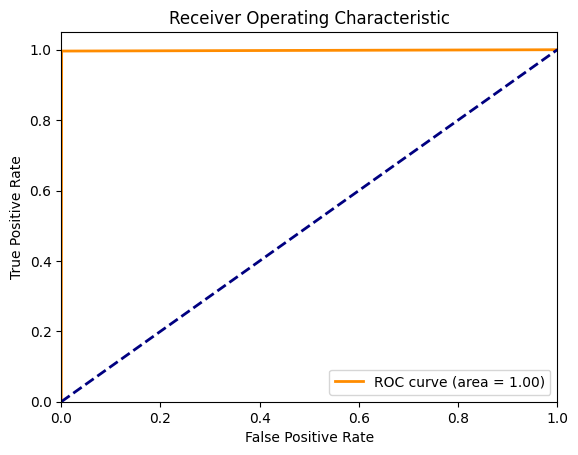

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


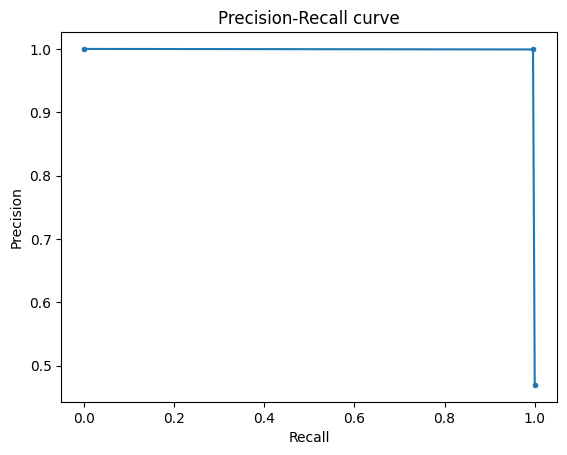

In [51]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.show()


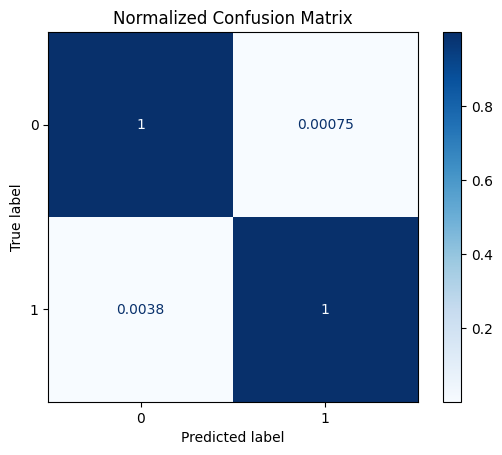

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

cm_normalized = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_normalized)
disp.plot(cmap=plt.cm.Blues)
plt.title("Normalized Confusion Matrix")
plt.show()


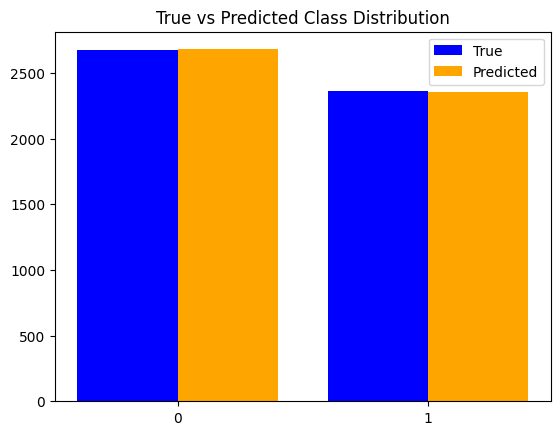

In [53]:
import numpy as np

# Plot histogram of predicted classes vs true classes
plt.hist([y_test, y_pred], bins=np.arange(len(set(y_test))+1)-0.5, label=['True', 'Predicted'], color=['blue', 'orange'])
plt.xticks(np.arange(len(set(y_test))))
plt.legend(loc='best')
plt.title('True vs Predicted Class Distribution')
plt.show()
